In [1]:
from pathlib import Path
import pandas as pd
import csv
import seaborn as sns
import datetime as dt
import numpy as np
%matplotlib inline


In [2]:
#Prepare the Data

In [3]:
whale_returns_pth = Path('/Users/ameerirfan/Desktop/FinTech_Bootcamp/Challenges/Module 4/Starter_Code/Resources/whale_returns.csv')
algo_returns_pth = Path('/Users/ameerirfan/Desktop/FinTech_Bootcamp/Challenges/Module 4/Starter_Code/Resources/algo_returns.csv')
sp_tsx_history_pth = Path('/Users/ameerirfan/Desktop/FinTech_Bootcamp/Challenges/Module 4/Starter_Code/Resources/sp_tsx_history.csv')

In [4]:
whale_returns_df = pd.read_csv(whale_returns_pth, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns_df.sort_index(ascending = True, inplace = True)

algo_returns_df = pd.read_csv(algo_returns_pth, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df.sort_index(ascending = True, inplace = True)

sp_tsx_history_df = pd.read_csv(sp_tsx_history_pth, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_tsx_history_df.sort_index(ascending = True, inplace = True)
sp_tsx_history_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [5]:
whale_returns_df[whale_returns_df.isnull().any(axis = 1)]
whale_returns_df.dropna(inplace=True)
whale_returns_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [6]:
algo_returns_df.isnull().sum()
algo_returns_df.dropna(inplace=True)
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [7]:
sp_tsx_history_df.dtypes

Close    object
dtype: object

In [9]:
sp_tsx_history_df["Close"]= sp_tsx_history_df["Close"].str.replace("$","").str.replace(',','').astype("float")
sp_tsx_history_df.head()

/var/folders/n4/gpv7p5n93k529lgh_r2dcw4h0000gn/T/ipykernel_36692/2113737378.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_history_df["Close"]= sp_tsx_history_df["Close"].str.replace("$","").str.replace(',','').astype("float")


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [10]:
sp_tsx_daily_returns = sp_tsx_history_df.pct_change()

sp_tsx_daily_returns.dropna(inplace = True)
sp_tsx_daily_returns.head()

sp_tsx_daily_returns.rename(columns = {"Close":"S&P_TSX"}, inplace = True)

In [12]:
combined_df = pd.concat([whale_returns_df, algo_returns_df,sp_tsx_daily_returns], axis = "columns",join = "inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


In [13]:
#Analysis

<AxesSubplot:xlabel='Date'>

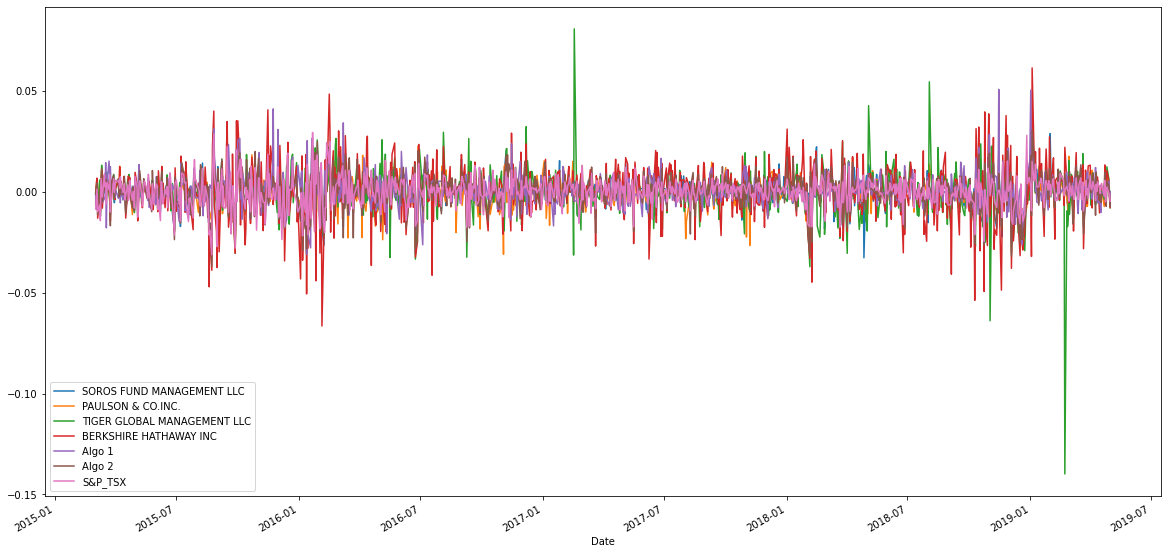

In [15]:
combined_df.plot(figsize = (20,10))

<AxesSubplot:xlabel='Date'>

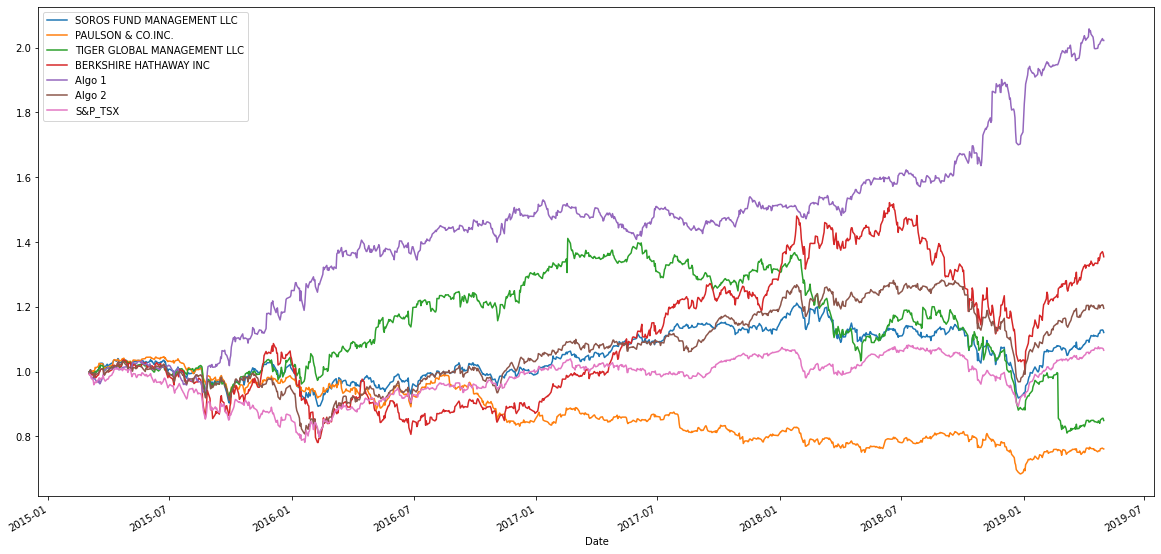

In [16]:
Cumulative_df = (1+ combined_df).cumprod()
Cumulative_df.plot(figsize = (20,10))

<AxesSubplot:>

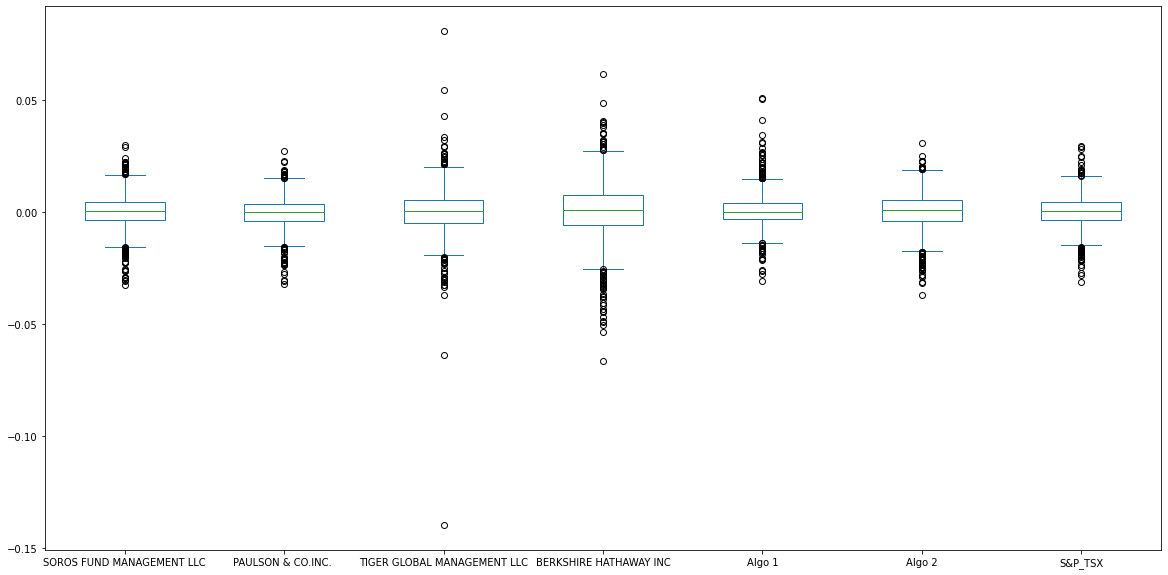

In [18]:
#Risk Analysis 
combined_df.plot(kind = "box", figsize = (20,10))

In [19]:
std_daily_df = pd.DataFrame(combined_df.std()).rename(columns = {0:"std"})
std_daily_df

,std
SOROS FUND MANAGEMENT LLC,0.007828
PAULSON & CO.INC.,0.006982
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326
S&P_TSX,0.007034


In [23]:
std_higher_than_sp_tsx = std_daily_df[std_daily_df["std"] > std_daily_df.loc["S&P_TSX", "std"]]
std_higher_than_sp_tsx

,std
SOROS FUND MANAGEMENT LLC,0.007828
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326


In [24]:
annualized_std_df = std_daily_df*np.sqrt(252)
annualized_std_df

,std
SOROS FUND MANAGEMENT LLC,0.124259
PAULSON & CO.INC.,0.110841
TIGER GLOBAL MANAGEMENT LLC,0.172759
BERKSHIRE HATHAWAY INC,0.203599
Algo 1,0.120470
Algo 2,0.132177
S&P_TSX,0.111664


<AxesSubplot:xlabel='Date'>

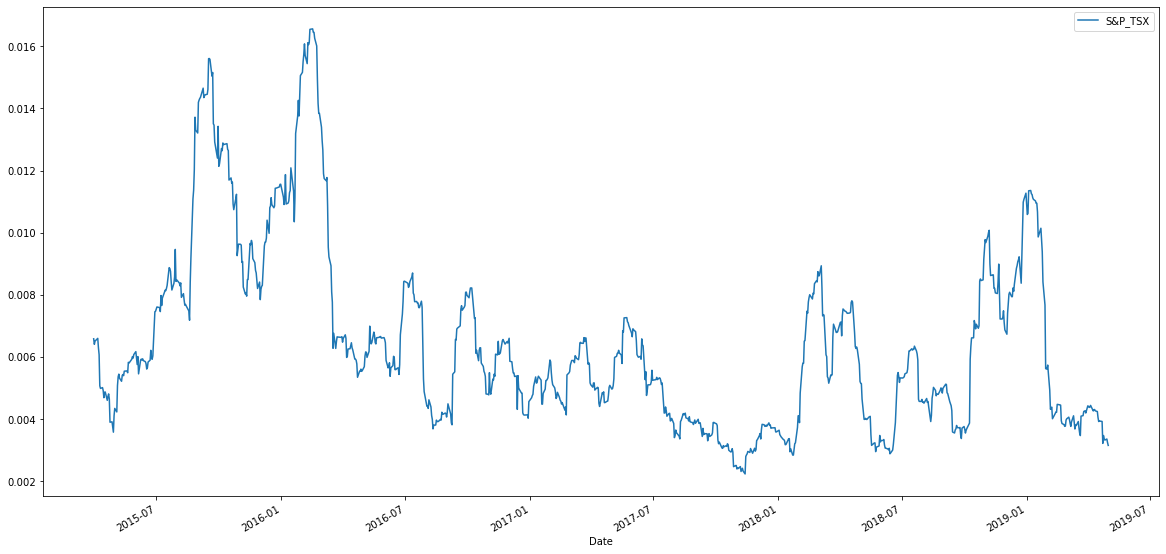

In [26]:
#ROLLING STATISTICS
sp_tsx_rolling = combined_df[["S&P_TSX"]].rolling(window = 21).std()
sp_tsx_rolling.plot(figsize = (20,10))

In [27]:
correlation_sp_tsx = pd.DataFrame(combined_df.corr()).loc[:,"S&P_TSX"]
correlation_sp_tsx[correlation_sp_tsx==correlation_sp_tsx[correlation_sp_tsx<1].max()]

Algo 2    0.73737
Name: S&P_TSX, dtype: float64

<AxesSubplot:xlabel='S&P_TSX', ylabel='Algo 2'>

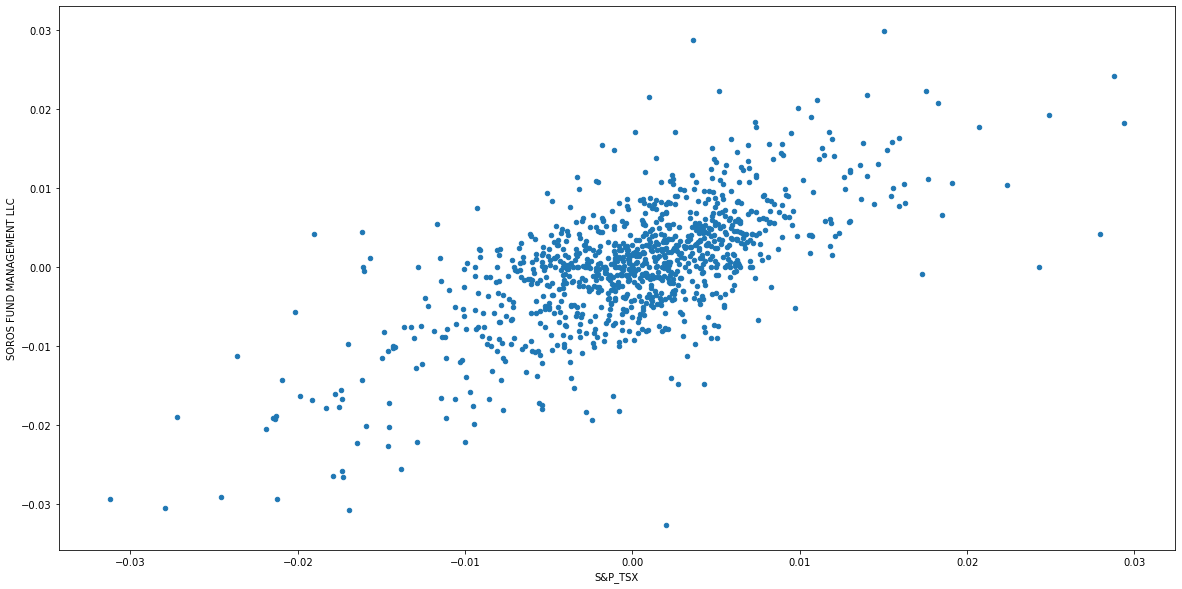

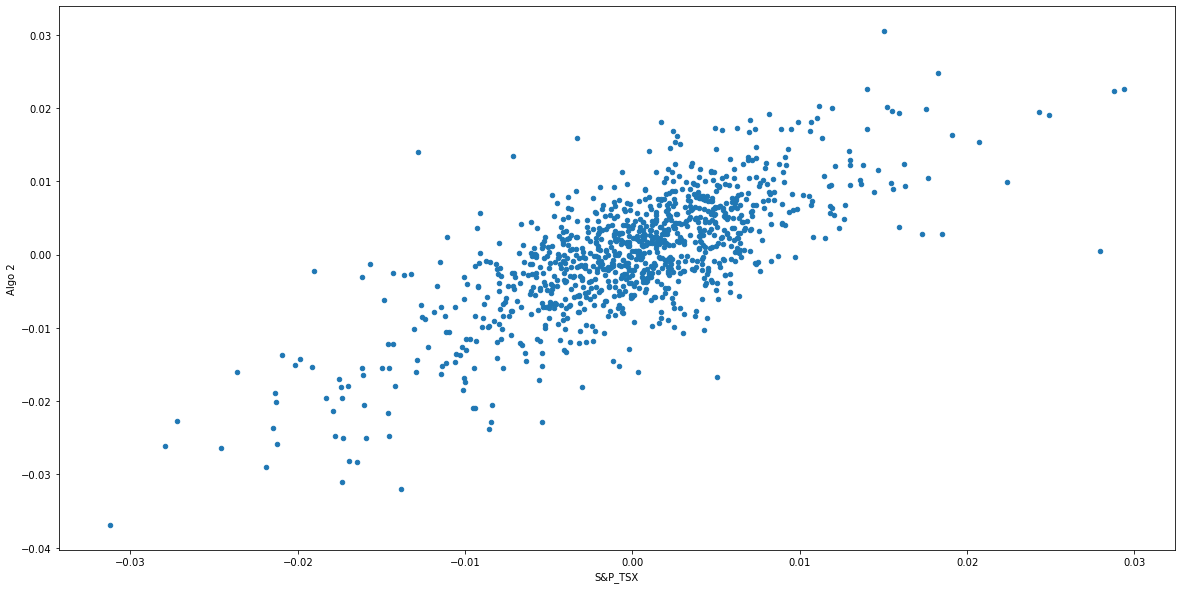

In [33]:
combined_df.plot(kind="scatter", y = "SOROS FUND MANAGEMENT LLC", x = "S&P_TSX", figsize = (20,10))
combined_df.plot(kind="scatter", y = "Algo 2", x = "S&P_TSX", figsize = (20,10))


<AxesSubplot:title={'center':'Rolling 60-Day Beta of TIGER GLOBAL MANAGEMENT'}, xlabel='Date'>

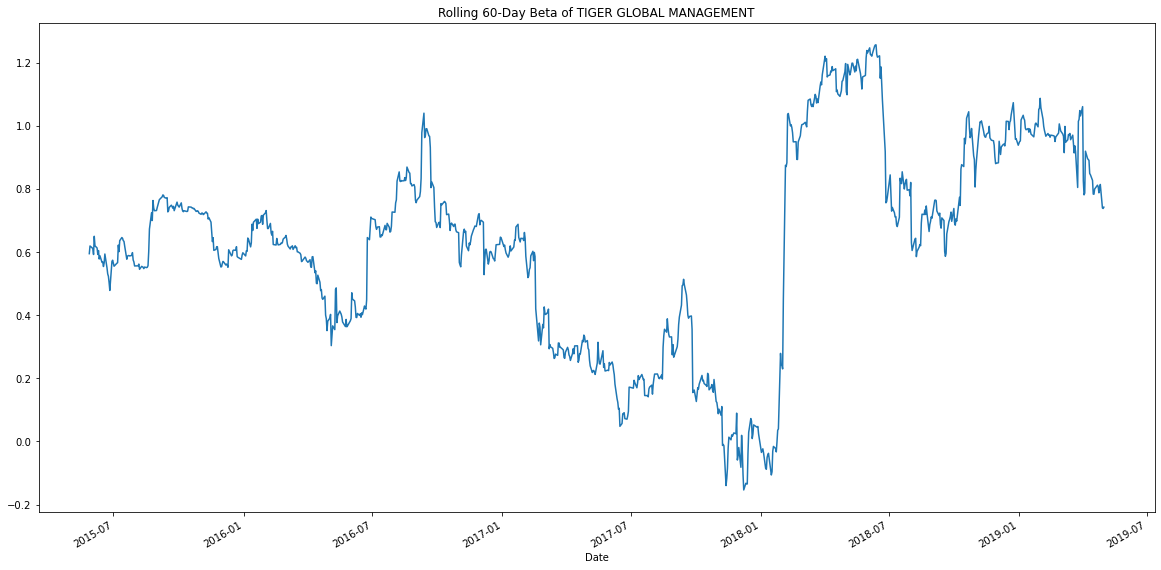

In [39]:
covariance_rolling= combined_df['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(combined_df['S&P_TSX'])
variance_rolling = combined_df['S&P_TSX'].rolling(window=60).var()
beta_rolling = covariance_rolling / variance_rolling
beta_rolling.plot(figsize=(20, 10), title='Rolling 60-Day Beta of TIGER GLOBAL MANAGEMENT')

In [41]:
#Sharpe Ratios
sharpe_ratios = combined_df.mean()*252/(combined_df.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P_TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios for Portfolios'}>

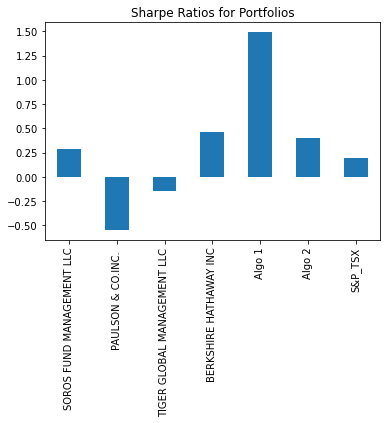

In [43]:
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios for Portfolios")

In [81]:
#The Algo 1 outperformed both the market and the respective whales, whereas Algo 2 outperformed the
#market and all whales except berkshire hathaway

In [82]:
#Custom Portfolio

In [83]:
AAPL_df= pd.read_csv(Path("/Users/ameerirfan/Desktop/FinTech_Bootcamp/Challenges/Module 4/AAPL DATA.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
AAPL_df.rename(columns = {"Close":"AAPL"}, inplace = True)
AAPL_df.head()

,AAPL
Date,
2015-03-02 16:00:00,32.27
2015-03-03 16:00:00,32.34
2015-03-04 16:00:00,32.14
2015-03-05 16:00:00,31.60
2015-03-06 16:00:00,31.65


In [84]:
MSFT_df= pd.read_csv(Path("/Users/ameerirfan/Desktop/FinTech_Bootcamp/Challenges/Module 4/MSFT DATA.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
MSFT_df.rename(columns = {"Close":"MSFT"}, inplace = True)
MSFT_df.head()

,MSFT
Date,
2015-03-02 16:00:00,43.88
2015-03-03 16:00:00,43.28
2015-03-04 16:00:00,43.06
2015-03-05 16:00:00,43.11
2015-03-06 16:00:00,42.36


In [85]:
NFLX_df= pd.read_csv(Path("/Users/ameerirfan/Desktop/FinTech_Bootcamp/Challenges/Module 4/NFLX DATA.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
NFLX_df.rename(columns = {"Close":"NFLX"}, inplace = True)
NFLX_df.head()

,NFLX
Date,
2015-03-02 16:00:00,68.61
2015-03-03 16:00:00,67.82
2015-03-04 16:00:00,67.11
2015-03-05 16:00:00,66.81
2015-03-06 16:00:00,64.87


In [86]:
SHOP_df= pd.read_csv(Path("/Users/ameerirfan/Desktop/FinTech_Bootcamp/Challenges/Module 4/SHOP DATA.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
SHOP_df.rename(columns = {"Close":"SHOP"}, inplace = True)
SHOP_df.head()

,SHOP
Date,
2015-05-21 16:00:00,25.68
2015-05-22 16:00:00,28.31
2015-05-26 16:00:00,29.65
2015-05-27 16:00:00,27.50
2015-05-28 16:00:00,27.45


In [87]:
portfolio_stocks = pd.concat((AAPL_df, MSFT_df, NFLX_df, SHOP_df), axis = 1, join= "inner")
portfolio_stocks.sort_index(ascending = True, inplace = True)
portfolio_stocks.head()

,AAPL,MSFT,NFLX,SHOP
Date,,,,
2015-05-21 16:00:00,32.85,47.42,89.00,25.68
2015-05-22 16:00:00,33.14,46.90,88.84,28.31
2015-05-26 16:00:00,32.41,46.59,87.99,29.65
2015-05-27 16:00:00,33.01,47.61,89.86,27.50
2015-05-28 16:00:00,32.95,47.45,89.51,27.45


In [88]:
portfolio_stocks.dropna(inplace=True)

In [89]:
weights = [1/4, 1/4, 1/4,1/4]
portfolio_total = portfolio_stocks.dot(weights)
portfolio_returns = portfolio_total.pct_change()
portfolio_returns.head()

Date
2015-05-21 16:00:00         NaN
2015-05-22 16:00:00    0.011490
2015-05-26 16:00:00   -0.002789
2015-05-27 16:00:00    0.006814
2015-05-28 16:00:00   -0.003132
dtype: float64

In [94]:

Total_portfolio_returns = pd.concat([portfolio_returns, combined_df], axis = "columns",join = "outer")
Total_portfolio_returns.rename(columns = {0:"MY PORTFOLIO"}, inplace = True)
Total_portfolio_returns

,MY PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX
Date,,,,,,,,
2015-03-03 00:00:00,NaN,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04 00:00:00,NaN,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05 00:00:00,NaN,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06 00:00:00,NaN,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09 00:00:00,NaN,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...,...
2019-04-29 00:00:00,NaN,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788
2019-04-29 16:00:00,0.000565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-30 00:00:00,NaN,-0.001295,-0.002211,-0.000259,-0.003702,-0.002944,-0.001570,-0.001183


In [97]:
Total_portfolio_returns.dropna(inplace=True)
Total_portfolio_returns

,MY PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX
Date,,,,,,,,
